In [35]:
import requests
from bs4 import BeautifulSoup

# Set the URL of the website to scrape
url = 'https://www.property24.co.ke/property-for-sale-in-nairobi-p95'

# Make a request to the website
response = requests.get(url)

# Check if the response was successful
if response.status_code != 200:
    print(f'Request failed with status code {response.status_code}')
    exit()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the housing price elements on the page
price_elements = soup.find_all('div', class_='sc_listingTilePrice primaryColor')

# Check if any price elements were found
if not price_elements:
    print('No price elements found')
    exit()

# Extract the housing prices
prices = [price.text.strip() for price in price_elements]

#...Karen Land Prices ...#

# Set the URL of the website to scrape
url = 'https://www.property24.co.ke/property-for-sale-in-karen-s14524'

# Make a request to the website
response = requests.get(url)


# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the housing price elements on the page
price_elements = soup.find_all('div', class_='sc_listingTilePrice primaryColor')

# Extract the housing prices
Karen_prices = [price.text.strip() for price in price_elements]


#...KILIMANI Land Prices ...#

# Set the URL of the website to scrape
url = 'https://www.property24.co.ke/property-for-sale-in-kilimani-s14522'

# Make a request to the website
response = requests.get(url)


# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the housing price elements on the page
price_elements = soup.find_all('div', class_='sc_listingTilePrice primaryColor')

# Extract the housing prices
Kilimani_prices = [price.text.strip() for price in price_elements]

#...WESTLANDS Land Prices ...#

# Set the URL of the website to scrape
url = 'https://www.property24.co.ke/property-for-sale-in-westlands-s14537'

# Make a request to the website
response = requests.get(url)


# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the housing price elements on the page
price_elements = soup.find_all('div', class_='sc_listingTilePrice primaryColor')

# Extract the housing prices
Westlands_prices = [price.text.strip() for price in price_elements]


#...Runda Land Prices ...#

# Set the URL of the website to scrape
url = 'https://www.property24.co.ke/property-for-sale-in-runda-s14519'

# Make a request to the website
response = requests.get(url)


# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the housing price elements on the page
price_elements = soup.find_all('div', class_='sc_listingTilePrice primaryColor')

# Extract the housing prices
Runda_prices = [price.text.strip() for price in price_elements]


PREPROCESSING AND CLEANING DATA

In [36]:
import re
import numpy as np

import re

# Define a function to convert a list of price strings to floats
def convert_prices(prices):
    # Remove 'KSh ' substring from each string
    prices = [re.sub(r'^KSh\s+', '', price) for price in prices]
    # Convert each string to a float
    prices = [float(re.sub(r'[^\d\.]+', '', price)) for price in prices]
    return prices

# Convert each variable to a list of floats using the function above
Karen_prices = convert_prices(Karen_prices)
Kilimani_prices = convert_prices(Kilimani_prices)
Westlands_prices = convert_prices(Westlands_prices)
Runda_prices = convert_prices(Runda_prices)
prices = convert_prices(prices)



STATISTICAL ANALYSIS

In [37]:
price_datasets = np.concatenate((Karen_prices,Kilimani_prices,Westlands_prices,Runda_prices))
price_datasets = list(dict.fromkeys(price_datasets)) # Remove repetition
Dataset_mean = np.mean(price_datasets)
print(f'MEAN LAND PRICE: {Dataset_mean}')

Dataset_median = np.median(price_datasets)
print(f'MEDIAN LAND PRICE: {Dataset_median}')

maximum = np.max(price_datasets)
print(f'Maximum : {maximum}')

minimum = np.min(price_datasets)
print(f"Minimum : {minimum}")

Dataset_std = np.std(price_datasets)
print(f'Standard Deviation : {Dataset_std}')


MEAN LAND PRICE: 78243508.78947368
MEDIAN LAND PRICE: 41000000.0
Maximum : 550000000.0
Minimum : 1.0
Standard Deviation : 99533906.3574202


DATA VISUALIZATIONS

FREQUENCY OF PRICES IN EACH OF THE TOWNS IN NAIROBI



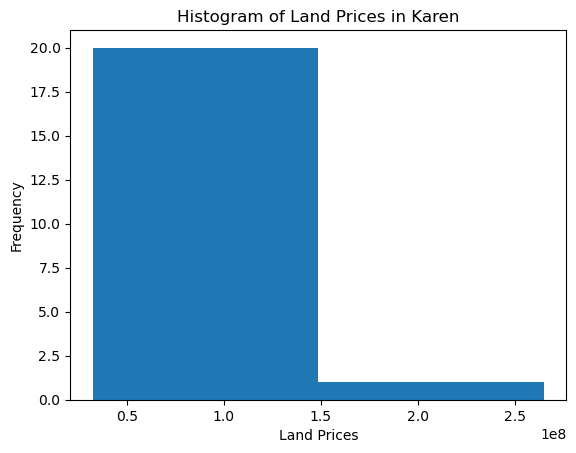

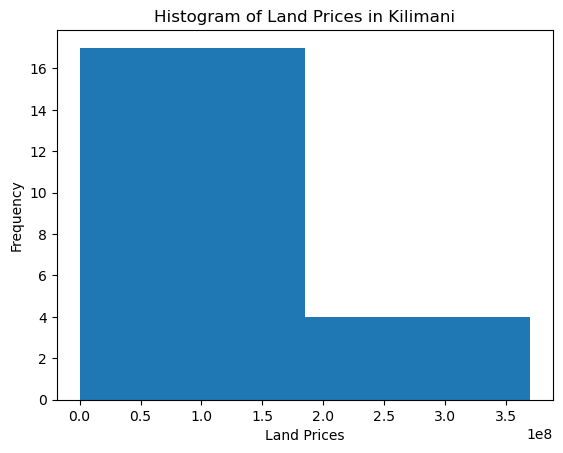

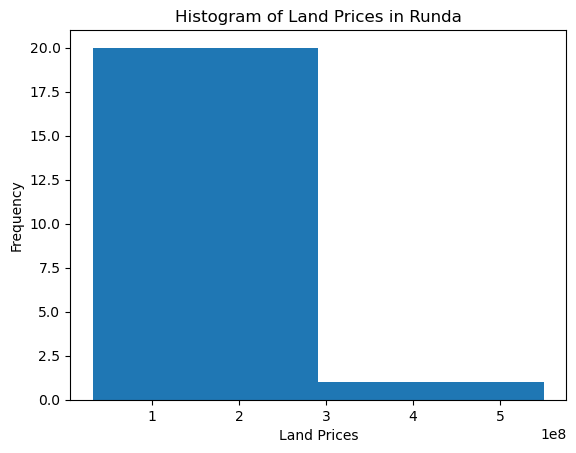

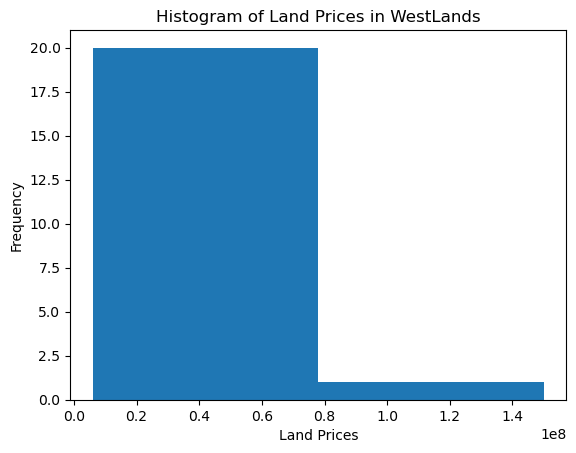

In [38]:
import matplotlib.pyplot as plt

print("FREQUENCY OF PRICES IN EACH OF THE TOWNS IN NAIROBI")
print('')

plt.hist(Karen_prices , bins=2)
plt.xlabel('Land Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Land Prices in Karen')
plt.show()

plt.hist(Kilimani_prices,bins=2)
plt.xlabel('Land Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Land Prices in Kilimani')
plt.show()

plt.hist(Runda_prices,bins=2)
plt.xlabel('Land Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Land Prices in Runda')
plt.show()

plt.hist(Westlands_prices,bins=2)
plt.xlabel('Land Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Land Prices in WestLands')
plt.show()



REGRESSION ANALYSIS

In [47]:
Karen_prices = np.array(Karen_prices)
Kilimani_prices = np.array(Kilimani_prices)
Westlands_prices = np.array(Westlands_prices)
Runda_prices = np.array(Runda_prices)
print(Karen_prices.shape)
print(Kilimani_prices.shape)
print(Runda_prices.shape)
print(Kilimani_prices.shape)


(21,)
(21,)
(21,)
(21,)


In [58]:
from sklearn.linear_model import LinearRegression
import pandas as pd

Karen_prices = np.array(Karen_prices)
Kilimani_prices = np.array(Kilimani_prices)
Westlands_prices = np.array(Westlands_prices)
Runda_prices = np.array(Runda_prices)

#price_datasets = np.concatenate([Karen_prices, Kilimani_prices, Westlands_prices, Runda_prices], axis=1)
price_datasets = np.vstack([Karen_prices, Kilimani_prices, Westlands_prices, Runda_prices]).T

price_datasets = np.nan_to_num(price_datasets)
print(price_datasets.shape)

if not all(arr.ndim == 1 for arr in [Karen_prices, Kilimani_prices, Westlands_prices, Runda_prices, price_datasets]):
    raise ValueError("Per-column arrays must each be 1-dimensional")

df = pd.DataFrame({'Karen_price': Karen_prices, 'Kilimani_price': Kilimani_prices, 'Westlands_price': Westlands_prices, 'Runda_price': Runda_prices, 'Dataset_price': price_datasets})

print(df)

X_train = df[['Karen_price', 'Kilimani_price', 'Westlands_price', 'Runda_price']].values
y_train = df['Dataset_price'].values

regressor = LinearRegression()
regressor.fit(X_train, y_train)

new_data = np.array([[100000000, 80000000, 50000000, 75000000]])
y_pred = regressor.predict(new_data)
print(y_pred)


(21, 4)


ValueError: Per-column arrays must each be 1-dimensional